This example shows mapping a small set of RGB colors to a 3D space using MiniSom. 

Import libraries, define RGB colors, and specify the dimensions of SOM :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from minisom import MiniSom

data = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]

N1 = 10
N2 = 10
N3 = 10

Define a function to get each neuron's weights and coordinate: 

In [2]:
def get_pos_and_color(weights):
    positions = np.zeros((N1*N2*N3, 3))
    colors = np.zeros((N1*N2*N3, 3))
    idx = 0
    for i, x in enumerate(weights):
      for j, y in enumerate(x):
        for k, z in enumerate(y):
          p = [i, j, k]         #position
          positions[idx] = p
          colors[idx] = z        #color
          idx += 1
    return positions, colors

Initialize SOM and plot the colors: 

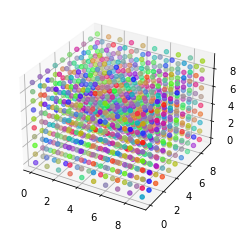

In [3]:
#initialize som
som = MiniSom(N1, N2, 3, sigma=3., learning_rate=2.5, 
              neighborhood_function='gaussian', z = N3)

#get positions and colors, then plot
weights = abs(som.get_weights())
positions, colors = get_pos_and_color(weights)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c = colors)

Train the SOM, and plot the weights after training:

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.032777552100672444


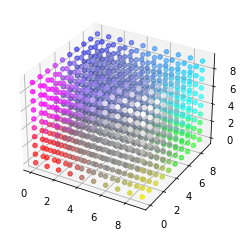

In [4]:
#train som
som.train(data, 500, random_order=True, verbose=True)

#get positions and colors, then plot
weights = abs(som.get_weights())
positions, colors = get_pos_and_color(weights)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c = colors)